<h1><center>Air Quality and 311 Requests 2021 - Finding Corelation</center></h1>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<h2>Reading and Displaying the Data</h2>

In [2]:
# Reading the requests around sensors data
req_around_sensors_df = pd.read_csv("req_around_sensors.csv")
req_around_sensors_df.head() 

CreatedDate  RequestType          ServiceDate   Latitude  \
0  2021-01-01 10:55:25  Bulky Items  2021-01-04 00:00:00  34.264866   
1  2021-01-01 10:57:45  Bulky Items  2021-01-04 00:00:00  34.266566   
2  2021-01-01 12:00:39  Bulky Items  2021-01-04 00:00:00  34.269679   
3  2021-01-01 13:45:49  Bulky Items  2021-01-04 00:00:00  34.266567   
4  2021-01-01 13:46:40  Bulky Items  2021-01-04 00:00:00  34.266567   

    Longitude  DistToSensor SensorName  SensorIndex  Sensor#  
0 -118.320353      0.852138       AEnv        85645        0  
1 -118.310450      1.000676       AEnv        85645        0  
2 -118.313909      1.988898       AEnv        85645        0  
3 -118.315061      0.877555       AEnv        85645        0  
4 -118.315061      1.324943       AEnv        85645        0

In [3]:
len(req_around_sensors_df)

255116

In [18]:
# reading the aqi for each sensor data
sensors_aqi_df = pd.read_csv('sensors_aqi.csv')
sensors_aqi_df.head()

date_local  pm1.0_cf_1  pm2.5_cf_1  pm10.0_cf_1  pm2.5_aqi  \
0  2021-01-01 16:00:00      3.9435      6.0165        6.829         25   

   pm10.0_aqi  aqi  sensor_index    sensor_name  
0           6   25         27109  AQMD_NASA_248

In [19]:
# to_datetime() method converts string format to a DateTime object
sensors_aqi_df['date_local'] = pd.to_datetime(sensors_aqi_df['date_local'])

In [20]:
# Rename the columns
sensors_aqi_df.rename({'date_local': 'Date', 'sensor_name': 'SensorName'}, axis=1, inplace=True)

# Change the form of 'date_local' into "year-month-day" (without hour, minute, and second)
sensors_aqi_df['Date'] = sensors_aqi_df['Date'].dt.date

sensors_aqi_df.head()

Date  pm1.0_cf_1  pm2.5_cf_1  pm10.0_cf_1  pm2.5_aqi  pm10.0_aqi  \
0  2021-01-01      3.9435      6.0165       6.8290         25           6   
1  2021-01-02     14.0400     21.6700      24.5025         71          23   
2  2021-01-03     15.7435     27.3480      31.3010         83          29   
3  2021-01-04      6.6400     10.6345      12.0850         44          11   
4  2021-01-05      4.1150      6.8820       7.9315         29           7   

   aqi  sensor_index     SensorName  
0   25         27109  AQMD_NASA_248  
1   71         27109  AQMD_NASA_248  
2   83         27109  AQMD_NASA_248  
3   44         27109  AQMD_NASA_248  
4   29         27109  AQMD_NASA_248

In [22]:
# to_datetime() method converts string format to a DateTime object
sensors_aqi_df['Date'] = pd.to_datetime(sensors_aqi_df['Date'])

In [23]:
# Check the type of each columns
sensors_aqi_df.dtypes

Date            datetime64[ns]
pm1.0_cf_1             float64
pm2.5_cf_1             float64
pm10.0_cf_1            float64
pm2.5_aqi                int64
pm10.0_aqi               int64
aqi                      int64
sensor_index             int64
SensorName              object
dtype: object

In [12]:
len(sensors_aqi_df)

3648

<h3>Merging Two DataFrames</h3>

We will merge `req_around_sensors_df` with `sensors_aqi_df`. Since `req_around_sensors_df - Created Date` is not in a daily form, we will uses grouping to turn the dataframe with daily time stamp. 

In [13]:
# Make a copy of req_around_sensors_df
req_around_sensors_df1 = req_around_sensors_df.copy()

# to_datetime() method converts string format to a DateTime object
req_around_sensors_df1['CreatedDate'] = pd.to_datetime(req_around_sensors_df1['CreatedDate'])

In [14]:
# Select several columns and assign it to the variable "group1"
group1 = req_around_sensors_df1[['CreatedDate', 'SensorName', 'Sensor#', 'DistToSensor']]

# Set the index of group1
group1.index = group1['CreatedDate']

# Group the SensorName by day and calculate the mean of the DistToSensor
group1 = group1.groupby('SensorName').resample("D").mean()

# Reset the index of group1
group1 = group1.reset_index()
group1.head()

SensorName CreatedDate  Sensor#  DistToSensor
0                                    AEnv  2021-01-01      0.0      1.359005
1                                    AEnv  2021-01-02      0.0      1.290715
2                                    AEnv  2021-01-03      0.0      1.352132
3                                    AEnv  2021-01-04      0.0      1.161365
4                                    AEnv  2021-01-05      0.0      1.539138
5                                    AEnv  2021-01-06      0.0      1.345331
6                                    AEnv  2021-01-07      0.0      1.438155
7                                    AEnv  2021-01-08      0.0      1.260281
8                                    AEnv  2021-01-09      0.0      1.279369
9                                    AEnv  2021-01-10      0.0      1.268670
10                                   AEnv  2021-01-11      0.0      1.172588
11                                   AEnv  2021-01-12      0.0      1.418569
12                                   AEnv  2021-01-13      0.0      1.402443
13                                   AEnv  2021-01-14      0.0      1.364082
14                                   AEnv  2021-01-15      0.0      1.287671
15                                   AEnv  2021-01-16      0.0      1.210548
16                                   AEnv  2021-01-17      0.0      1.196649
17                                   AEnv  2021-01-18      0.0      1.361125
18                                   AEnv  2021-01-19      0.0      1.420721
19                                   AEnv  2021-01-20      0.0      1.312697
20                                   AEnv  2021-01-21      0.0      1.340135
21                                   AEnv  2021-01-22      0.0      1.359984
22                                   AEnv  2021-01-23      0.0      1.401254
23                                   AEnv  2021-01-24      0.0      1.372188
24                                   AEnv  2021-01-25      0.0      1.212325
25                                   AEnv  2021-01-26      0.0      1.028589
26                                   AEnv  2021-01-27      0.0      1.297038
27                                   AEnv  2021-01-28      0.0      1.242916
28                                   AEnv  2021-01-29      0.0      1.527933
29                                   AEnv  2021-01-30      0.0      1.350409
30                                   AEnv  2021-01-31      0.0      1.292892
31                                   AEnv  2021-02-01      0.0      1.374038
32                                   AEnv  2021-02-02      0.0      1.332286
33                                   AEnv  2021-02-03      0.0      1.401053
34                                   AEnv  2021-02-04      0.0      1.417355
35                                   AEnv  2021-02-05      0.0      1.261471
36                                   AEnv  2021-02-06      0.0      1.291178
37                                   AEnv  2021-02-07      0.0      1.100166
38                                   AEnv  2021-02-08      0.0      1.381992
39                                   AEnv  2021-02-09      0.0      1.044574
40                                   AEnv  2021-02-10      0.0      1.509778
41                                   AEnv  2021-02-11      0.0      1.284854
42                                   AEnv  2021-02-12      0.0      1.429850
43                                   AEnv  2021-02-13      0.0      1.286769
44                                   AEnv  2021-02-14      0.0      1.395603
45                                   AEnv  2021-02-15      0.0      1.492158
46                                   AEnv  2021-02-16      0.0      1.418842
47                                   AEnv  2021-02-17      0.0      1.369132
48                                   AEnv  2021-02-18      0.0      1.343065
49                                   AEnv  2021-02-19      0.0      1.433875
50                                   AEnv  2021-02-20      0.0      1.311584
51                         

In [15]:
# Select several columns and assign it to the variable "group2"
group2 = req_around_sensors_df1[['CreatedDate','SensorName']]

# Set the index of df2
group2.index = group2['CreatedDate']

# Group the SensorName by day and count the number of request per day
group2 = group2.groupby('SensorName').resample("D").agg({'SensorName':'size'})

# Specify the column's name of group2
group2.columns = ["RequestCount"]

# Reset the index of group2
group2 = group2.reset_index()
group2.head()

SensorName CreatedDate  RequestCount
0                                    AEnv  2021-01-01            17
1                                    AEnv  2021-01-02            26
2                                    AEnv  2021-01-03            38
3                                    AEnv  2021-01-04            24
4                                    AEnv  2021-01-05            14
5                                    AEnv  2021-01-06            21
6                                    AEnv  2021-01-07            13
7                                    AEnv  2021-01-08            29
8                                    AEnv  2021-01-09            26
9                                    AEnv  2021-01-10            29
10                                   AEnv  2021-01-11            19
11                                   AEnv  2021-01-12            49
12                                   AEnv  2021-01-13            15
13                                   AEnv  2021-01-14            23
14                                   AEnv  2021-01-15            25
15                                   AEnv  2021-01-16            27
16                                   AEnv  2021-01-17            46
17                                   AEnv  2021-01-18            22
18                                   AEnv  2021-01-19            12
19                                   AEnv  2021-01-20            15
20                                   AEnv  2021-01-21            17
21                                   AEnv  2021-01-22            24
22                                   AEnv  2021-01-23            19
23                                   AEnv  2021-01-24            37
24                                   AEnv  2021-01-25            12
25                                   AEnv  2021-01-26             9
26                                   AEnv  2021-01-27            17
27                                   AEnv  2021-01-28            13
28                                   AEnv  2021-01-29            16
29                                   AEnv  2021-01-30            23
30                                   AEnv  2021-01-31            24
31                                   AEnv  2021-02-01            19
32                                   AEnv  2021-02-02            18
33                                   AEnv  2021-02-03            15
34                                   AEnv  2021-02-04            17
35                                   AEnv  2021-02-05            21
36                                   AEnv  2021-02-06            20
37                                   AEnv  2021-02-07            26
38                                   AEnv  2021-02-08            13
39                                   AEnv  2021-02-09            13
40                                   AEnv  2021-02-10            15
41                                   AEnv  2021-02-11            12
42                                   AEnv  2021-02-12            20
43                                   AEnv  2021-02-13            19
44                                   AEnv  2021-02-14            31
45                                   AEnv  2021-02-15             5
46                                   AEnv  2021-02-16            23
47                                   AEnv  2021-02-17            11
48                                   AEnv  2021-02-18            23
49                                   AEnv  2021-02-19            17
50                                   AEnv  2021-02-20            18
51                                   AEnv  2021-02-21            34
52                                   AEnv  2021-02-22            18
53                                   AEnv  2021-02-23            14
54                                   AEnv  2021-02-24            15
55                                   AEnv  2021-02-25            12
56                                   AEnv  2021-02-26            18
57                                   AEnv  2021-02-27            13
58                 

In [16]:
# Merge group1 and group2 to create req_around_sensors_df2
req_around_sensors_df2 = pd.merge(group1, group2, on=["SensorName", "CreatedDate"])
req_around_sensors_df2.head()

SensorName CreatedDate  Sensor#  DistToSensor  \
0                                    AEnv  2021-01-01      0.0      1.359005   
1                                    AEnv  2021-01-02      0.0      1.290715   
2                                    AEnv  2021-01-03      0.0      1.352132   
3                                    AEnv  2021-01-04      0.0      1.161365   
4                                    AEnv  2021-01-05      0.0      1.539138   
5                                    AEnv  2021-01-06      0.0      1.345331   
6                                    AEnv  2021-01-07      0.0      1.438155   
7                                    AEnv  2021-01-08      0.0      1.260281   
8                                    AEnv  2021-01-09      0.0      1.279369   
9                                    AEnv  2021-01-10      0.0      1.268670   
10                                   AEnv  2021-01-11      0.0      1.172588   
11                                   AEnv  2021-01-12      0.0      1.418569   
12                                   AEnv  2021-01-13      0.0      1.402443   
13                                   AEnv  2021-01-14      0.0      1.364082   
14                                   AEnv  2021-01-15      0.0      1.287671   
15                                   AEnv  2021-01-16      0.0      1.210548   
16                                   AEnv  2021-01-17      0.0      1.196649   
17                                   AEnv  2021-01-18      0.0      1.361125   
18                                   AEnv  2021-01-19      0.0      1.420721   
19                                   AEnv  2021-01-20      0.0      1.312697   
20                                   AEnv  2021-01-21      0.0      1.340135   
21                                   AEnv  2021-01-22      0.0      1.359984   
22                                   AEnv  2021-01-23      0.0      1.401254   
23                                   AEnv  2021-01-24      0.0      1.372188   
24                                   AEnv  2021-01-25      0.0      1.212325   
25                                   AEnv  2021-01-26      0.0      1.028589   
26                                   AEnv  2021-01-27      0.0      1.297038   
27                                   AEnv  2021-01-28      0.0      1.242916   
28                                   AEnv  2021-01-29      0.0      1.527933   
29                                   AEnv  2021-01-30      0.0      1.350409   
30                                   AEnv  2021-01-31      0.0      1.292892   
31                                   AEnv  2021-02-01      0.0      1.374038   
32                                   AEnv  2021-02-02      0.0      1.332286   
33                                   AEnv  2021-02-03      0.0      1.401053   
34                                   AEnv  2021-02-04      0.0      1.417355   
35                                   AEnv  2021-02-05      0.0      1.261471   
36                                   AEnv  2021-02-06      0.0      1.291178   
37                                   AEnv  2021-02-07      0.0      1.100166   
38                                   AEnv  2021-02-08      0.0      1.381992   
39                                   AEnv  2021-02-09      0.0      1.044574   
40                                   AEnv  2021-02-10      0.0      1.509778   
41                                   AEnv  2021-02-11      0.0      1.284854   
42                                   AEnv  2021-02-12      0.0      1.429850   
43                                   AEnv  2021-02-13      0.0      1.286769   
44                                   AEnv  2021-02-14      0.0      1.395603   
45                                   AEnv  2021-02-15      0.0      1.492158   
46                                   AEnv  2021-02-16      0.0      1.418842   
47                                   AEnv  2021-02-17      0.0      1.369132   
48                                   AEnv  2021-02-18      0.0      1.343065   
49                             

Now we will merge `req_around_sensors_df2` with `sensors_aqi_df`. From `getting_data_through_api_part_b.ipynb`, we found that __Nichols Canyon Road__ has two missing time stamps, which are `2021-08-06` and `2021-08-07`. Therefore, we will remove these time stamps from `req_around_sensors_df2` so the new dataframe will have 3648 rows instead of 3650 rows.

In [17]:
# Rename the columns
req_around_sensors_df2.rename({'CreatedDate': 'Date'}, axis=1, inplace=True)

# Merge ensors_aqi_df and req_around_sensors_df2 to create req_aqi_df
req_aqi_df = pd.merge(sensors_aqi_df, req_around_sensors_df2, on=['Date', "SensorName"])

# Sort req_aqi_df by Sensor# and Date in ascending order
req_aqi_df = req_aqi_df.sort_values(['Sensor#', 'Date'], ascending=[True, True])

# Reset the index
req_aqi_df = req_aqi_df.reset_index(drop=True)
req_aqi_df.head()

Date  pm1.0_cf_1  pm2.5_cf_1  pm10.0_cf_1  pm2.5_aqi  pm10.0_aqi  \
0    2021-01-01      3.0220      4.8420       5.5135         20           5   
1    2021-01-02     13.1195     20.6330      22.9205         69          21   
2    2021-01-03     11.5385     18.5800      20.7120         65          19   
3    2021-01-04     12.7075     21.1295      23.7280         70          22   
4    2021-01-05      6.4895     11.5610      13.3265         48          12   
5    2021-01-06      2.7300      4.8325       5.8200         20           5   
6    2021-01-07      1.2135      2.3325       2.8790         10           3   
7    2021-01-08      1.5375      2.9170       3.6905         12           3   
8    2021-01-09      1.2495      2.3195       2.9420         10           3   
9    2021-01-10      4.1140      6.3500       7.3590         26           7   
10   2021-01-11      1.2375      2.2135       2.7780          9           3   
11   2021-01-12      3.6640      5.8825       6.9030         25           6   
12   2021-01-13      0.9745      1.8620       2.4040          8           2   
13   2021-01-14      0.0910      0.2585       0.4460          1           0   
14   2021-01-15      0.8810      1.6375       2.0980          7           2   
15   2021-01-16      0.0575      0.2170       0.3725          1           0   
16   2021-01-17      0.8900      1.5715       1.9480          7           2   
17   2021-01-18     14.5640     28.1205      32.2490         85          30   
18   2021-01-19      0.0310      0.3270       0.6870          1           1   
19   2021-01-20      0.4685      1.0625       1.4785          4           1   
20   2021-01-21      4.4860      7.0185       8.0240         29           7   
21   2021-01-22      1.3655      2.5265       3.3190         11           3   
22   2021-01-23      9.7635     14.0460      15.0990         55          14   
23   2021-01-24      1.3640      2.3430       3.1240         10           3   
24   2021-01-25      0.6580      1.3185       1.7395          5           2   
25   2021-01-26      0.7885      1.6490       2.2860          7           2   
26   2021-01-27      3.1085      5.0910       6.0995         21           6   
27   2021-01-28      0.2625      0.7130       1.0965          3           1   
28   2021-01-29      2.2995      3.4965       3.8765         15           4   
29   2021-01-30      1.7985      2.7915       3.1340         12           3   
30   2021-01-31      0.8925      1.5445       1.8670          6           2   
31   2021-02-01      3.0320      5.3200       6.2360         22           6   
32   2021-02-02      1.8360      2.9925       3.5125         12           3   
33   2021-02-03      9.4820     16.1920      18.4405         60          17   
34   2021-02-04      4.6700      7.5220       8.5985         31           8   
35   2021-02-05      4.0615      6.5505       7.6850         27           7   
36   2021-02-06      5.8075     10.0510      11.6775         42          11   
37   2021-02-07     24.4980     43.9395      49.9700        122          46   
38   2021-02-08     22.5615     44.3155      50.5075        123          47   
39   2021-02-09     23.2425     43.4115      49.0785        120          45   
40   2021-02-10     15.7930     28.1170      31.5495         85          29   
41   2021-02-11     17.4465     34.0020      38.5410         97          36   
42   2021-02-12      3.1070      5.2870       6.4300         22           6   
43   2021-02-13      0.3635      0.7890       1.1250          3           1   
44   2021-02-14      1.2735      2.3505       3.1660         10           3   
45   2021-02-15      5.5620      9.7535      11.7265         41          11   
46   2021-02-16      1.8485      2.9530       3.5850         12           3   
47   2021-02-17      1.9665      3.1285       3.7250         13           3   
48   2021-02-18      2.8340      4.4375       5.1330         18           5   
49   2021-02-19      4.9195      7.8145       8.9370         

<h2>Exploratory Data Analysis</h2>

In [27]:
req_aqi_df.columns

Index(['Date', 'pm1.0_cf_1', 'pm2.5_cf_1', 'pm10.0_cf_1', 'pm2.5_aqi',
       'pm10.0_aqi', 'aqi', 'sensor_index', 'SensorName', 'Sensor#',
       'DistToSensor', 'RequestCount'],
      dtype='object')

In [30]:
df_int = req_aqi_df[['pm1.0_cf_1', 'pm2.5_cf_1', 'pm10.0_cf_1', 'pm2.5_aqi',
       'pm10.0_aqi', 'aqi', 'DistToSensor', 'RequestCount']]

# Get a statistical summary of each column with numerical attribute
df_int.describe()

pm1.0_cf_1   pm2.5_cf_1  pm10.0_cf_1    pm2.5_aqi   pm10.0_aqi  \
count  3648.000000  3648.000000  3648.000000  3648.000000  3648.000000   
mean      9.407303    15.203620    17.380237    50.728070    15.747533   
std      12.141135    16.220206    18.036524    33.867248    14.516109   
min       0.001000     0.016000     0.088000     0.000000     0.000000   
25%       3.902375     6.049750     7.097625    25.000000     7.000000   
50%       7.700250    11.829250    13.393750    49.000000    12.000000   
75%      12.173750    19.599750    22.065250    67.000000    20.000000   
max     444.559000   458.014000   466.396000   472.000000   353.000000   

               aqi  DistToSensor  RequestCount  
count  3648.000000   3648.000000   3648.000000  
mean     50.728070      1.318170     69.918311  
std      33.867248      0.084932     56.650743  
min       0.000000      0.767499      1.000000  
25%      25.000000      1.270342     27.000000  
50%      49.000000      1.317922     56.000000  
75%      67.000000      1.368165     91.000000  
max     472.000000      1.742714    356.000000

array([[<AxesSubplot:title={'center':'pm1.0_cf_1'}>,
        <AxesSubplot:title={'center':'pm2.5_cf_1'}>,
        <AxesSubplot:title={'center':'pm10.0_cf_1'}>],
       [<AxesSubplot:title={'center':'pm2.5_aqi'}>,
        <AxesSubplot:title={'center':'pm10.0_aqi'}>,
        <AxesSubplot:title={'center':'aqi'}>],
       [<AxesSubplot:title={'center':'DistToSensor'}>,
        <AxesSubplot:title={'center':'RequestCount'}>, <AxesSubplot:>]],
      dtype=object)

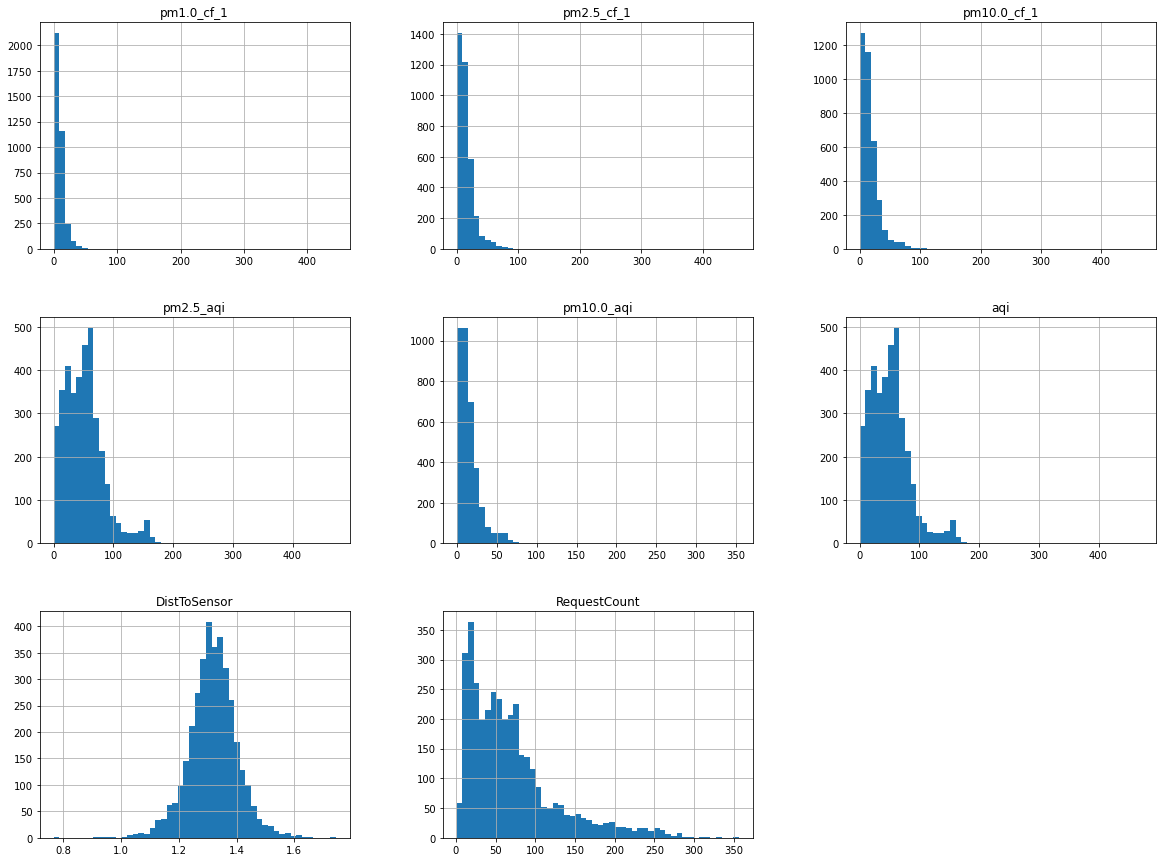

In [32]:
df_int.hist(bins=50, figsize=(20,15))

pm1.0_cf_1  pm2.5_cf_1  pm10.0_cf_1  pm2.5_aqi  pm10.0_aqi  \
pm1.0_cf_1      1.000000    0.953336     0.926805   0.788921    0.886029   
pm2.5_cf_1      0.953336    1.000000     0.994490   0.917023    0.978462   
pm10.0_cf_1     0.926805    0.994490     1.000000   0.930352    0.988394   
pm2.5_aqi       0.788921    0.917023     0.930352   1.000000    0.963188   
pm10.0_aqi      0.886029    0.978462     0.988394   0.963188    1.000000   
aqi             0.788921    0.917023     0.930352   1.000000    0.963188   
DistToSensor   -0.008839   -0.005192    -0.003478  -0.006293   -0.003364   
RequestCount    0.050461    0.044490     0.035823   0.082624    0.046414   

                   aqi  DistToSensor  RequestCount  
pm1.0_cf_1    0.788921     -0.008839      0.050461  
pm2.5_cf_1    0.917023     -0.005192      0.044490  
pm10.0_cf_1   0.930352     -0.003478      0.035823  
pm2.5_aqi     1.000000     -0.006293      0.082624  
pm10.0_aqi    0.963188     -0.003364      0.046414  
aqi           1.000000     -0.006293      0.082624  
DistToSensor -0.006293      1.000000     -0.027048  
RequestCount  0.082624     -0.027048      1.000000

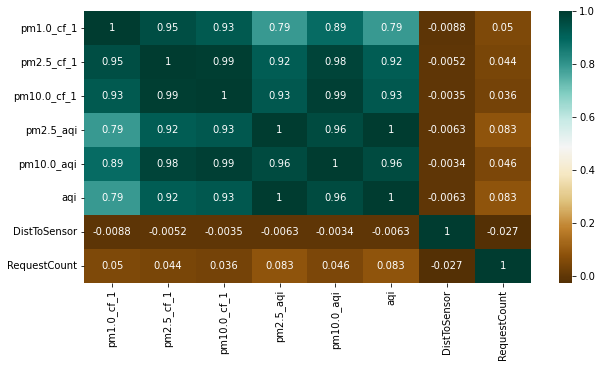

In [37]:
# Check the correlation (Pearson Correlation) between variables
plt.figure(figsize=(10,5))
c= df_int.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

From the above heat map we can see that linear correllation between the `aqi`, `DistToSensor`, and `RequestsCount` is not very strong, since they are between -0.00063 and 0.083. Note that there is a very high correlation between `pm2.5`, `pm10`, `pm2.5_aqi`, `pm10_aqi`, and `aqi`. This is make sense since `pm2.5_aqi` is derived from `pm2.5`, similary `pm10_aqi` is derived from `pm10`, and the `aqi` is just the max of `pm2.5` and `pm10`.

We will add a column called "Level" which is the __Level of Concern__ based on the value of the aqi. The cut off was taken from [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/).

In [43]:
temp_list = []
level = ""
for i in range(len(req_aqi_df)):
    if req_aqi_df["aqi"][i] >= 301:
        level = "Hazardous"
    elif req_aqi_df["aqi"][i] >= 201:
        level = "Very Unhealthy"
    elif req_aqi_df["aqi"][i] >= 151:
        level = "Unhealthy"
    elif req_aqi_df["aqi"][i] >= 101:
        level = "Unhealthy for Sensitive Groups"
    elif req_aqi_df["aqi"][i] >= 51:
        level = "Moderate"
    elif req_aqi_df["aqi"][i] >= 0:
        level = "Good"
    else:
        level = None
    temp_list.append(level)

req_aqi_df["Level"] = temp_list

req_aqi_df.head()

Date  pm1.0_cf_1  pm2.5_cf_1  pm10.0_cf_1  pm2.5_aqi  pm10.0_aqi  aqi  \
0 2021-01-01      3.0220      4.8420       5.5135         20           5   20   
1 2021-01-02     13.1195     20.6330      22.9205         69          21   69   
2 2021-01-03     11.5385     18.5800      20.7120         65          19   65   
3 2021-01-04     12.7075     21.1295      23.7280         70          22   70   
4 2021-01-05      6.4895     11.5610      13.3265         48          12   48   

   sensor_index SensorName  Sensor#  DistToSensor  RequestCount     Level  
0         85645       AEnv      0.0      1.359005            17      Good  
1         85645       AEnv      0.0      1.290715            26  Moderate  
2         85645       AEnv      0.0      1.352132            38  Moderate  
3         85645       AEnv      0.0      1.161365            24  Moderate  
4         85645       AEnv      0.0      1.539138            14      Good

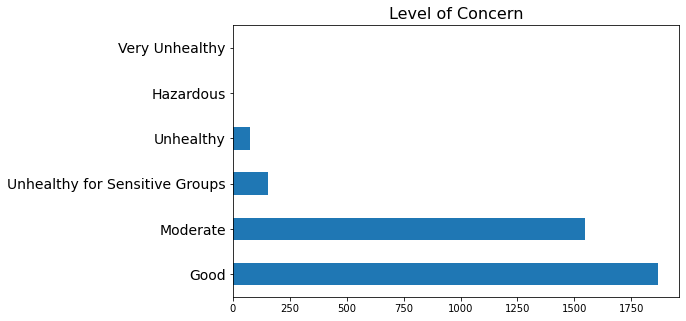

In [53]:
req_aqi_df["Level"].value_counts().plot(kind="barh", figsize=(8,5))

plt.yticks(fontsize = 14)
plt.title('Level of Concern', fontsize = 16)

plt.show()

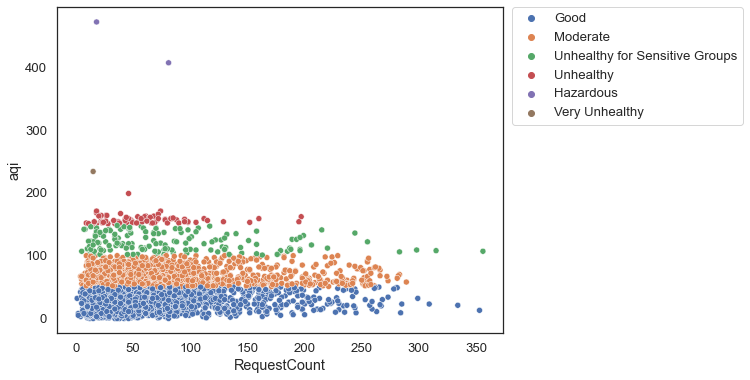

In [88]:
plt.figure(figsize = (8,6))
sns.set(style='white', font_scale = 1.2)
sns.scatterplot(data=req_aqi_df, x=req_aqi_df["RequestCount"], y=req_aqi_df["aqi"], hue="Level")
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

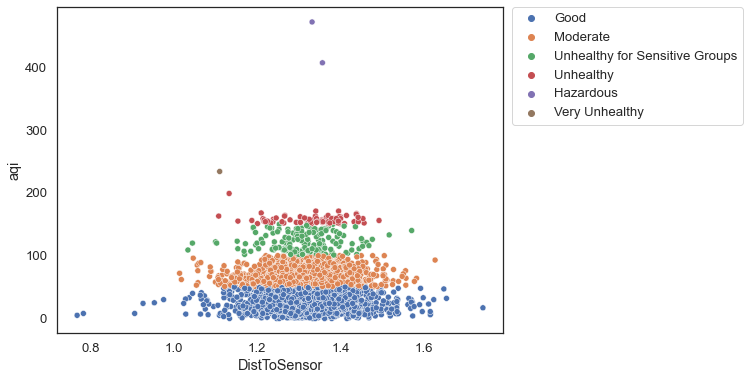

In [89]:
plt.figure(figsize = (8,6))
sns.set(style='white', font_scale = 1.2)
sns.scatterplot(data=req_aqi_df, x=req_aqi_df["DistToSensor"], y=req_aqi_df["aqi"], hue="Level")
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

From the scatter plot above, we can see that there is no linear correlation between `DistToSensor` and `aqi`, and between `RequestCount` and `aqi`.

<h2>Removing Outliers</h2>